In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.data import AUTOTUNE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Rescaling
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory, normalize, get_file
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tensorflow import keras
import h5py
import numpy as np
import time

In [5]:
data = np.load('/home/sairaman/Desktop/stead-dataset/data/waveforms/trial_noise.npy')
# data['ET_BCRT_15_23039.SAC']
data.files

array([-0.11371512, -0.12646186, -0.02683214, ...,  0.00122   ,
        0.00077551, -0.00061397])

In [ ]:
data = np.load("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_to_1d_array_normalized.npz")
file_list = data.files
train_examples = []
test_examples = []
split = int(len(file_list)*80/100)
train_list = file_list[0:split]
test_list = file_list[split+1:]
check = []

In [ ]:
for file_name in train_list:
    print(file_name)
    train_examples.append(data[file_name])
for file_name in test_list:
    print(file_name)
    test_examples.append(data[file_name])
np.savez_compressed('/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_to_1d_array_test_normalized.npz', np.array(test_examples))
np.savez_compressed('/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_to_1d_array_train_normalized.npz', np.array(train_examples))

In [ ]:
test = np.load("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_to_1d_array_train_normalized.npz")
test["arr_0"].shape

In [ ]:
data = test["arr_0"].reshape((86376,3500,1))
data.shape

In [ ]:
data

In [ ]:
from keras.layers import LSTM, RepeatVector, TimeDistributed
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3500,1)))
model.add(RepeatVector(3500))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit(data, data, epochs=30, verbose=0)

In [24]:
import obspy 
st = obspy.read("/home/sairaman/Desktop/stead-dataset/data/waveforms/chunk2_ir_removed/PB_B058_88_51715.SAC")

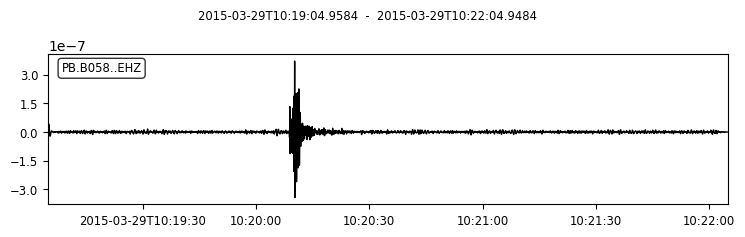

In [23]:
st.filter('bandpass', freqmin=1, freqmax=10, corners=2)
st.plot()
print()

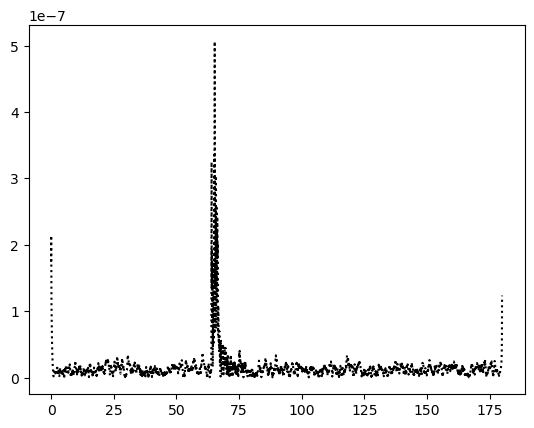

In [28]:
data = st[0].data
npts = st[0].stats.npts
samprate = st[0].stats.sampling_rate

# Filtering the Stream object
st_filt = st.copy()
st_filt.filter('bandpass', freqmin=1, freqmax=10, corners=2, zerophase=True)

# Envelope of filtered data
data_envelope = obspy.signal.filter.envelope(st_filt[0].data)

# The plotting, plain matplotlib
t = np.arange(0, npts / samprate, 1 / samprate)
#plt.plot(t, st_filt[0].data, 'k')
plt.plot(t, data_envelope, 'k:')